<h1 align='center' style='color:hotpink'>CAPSTONE PROJECT 2 : Predict Graduate Admissions</h1>

<h2 align='left' style='color:purple'>SUDIPTA GIRI </h2>

# Predict Graduate Admissions

**Probelm Statement**
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

**Content**
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

**Models**

1. Logistic Regression 
2. Random_Forest_Classifier 
3. Support Vector Machine
4. KNN (KNeighbors_Classifier)
5. Extra_Trees_Classifier
6. XGBClassifier
7. AdaBoost_Classifier
8. Decision Tree_Classifier
9.  Artificial Neural Network

### Load the Data and Analysis of Variables

In [1]:
## Load the Libraries 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

#visualizing libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Data and check the Column Names to check the Space in the Names
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
col_names=df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


*Observations:*<br>
1. As we said there were Space in Chance of Admit Variable
2. Serial No has Full stop Sign name it as no
3. Change the other variable into lowercase for easy to use 

**Rename columns to make their use easier.**

In [3]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

**The type of columns can be found as follows:**

In [4]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

**Check shape of the data and whether there exist missing values:**

In [5]:
print('Shape of the data:')
df.shape

Shape of the data:


(500, 9)

In [6]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

**Data has no missing values**

The "chance" column is the outcome variable and takes value between 0 and 1.<br> *1* represents that the subject is admitted to the program while *0* represents rejected applications.
Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, 
the analysis will continue as a prediction analysis of chance of admission.

### Data Exploration

First of all, let us see the basic statistics of the data.

In [7]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


*Observations:*<br>This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

* The mean, or average.
* 50% aka Median it is very import to understand Skeweness of the Data 
* The standard deviation, or how spread out the data is.
* The minimum and maximum value of each column
* The number of items that fall within the first, second, and third percentiles.

let us analyze the distribution of subjects' chance of admit in the data. Let us see how rating affects chance of admission:

In [8]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


*Observations:*<br>
Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings.
Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [9]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


### *Several observations:*

* Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
* Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
* Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

### Data Visualization

#### Histogram of Admission Chance

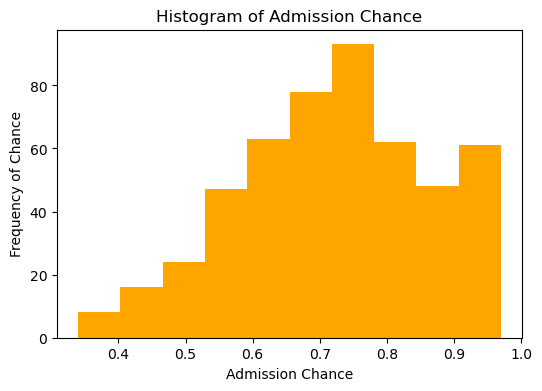

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

Histogram shows us that 'chance of admission' column is well distributed in data.

#### Line Plot for Research Output and The Chance of Admission

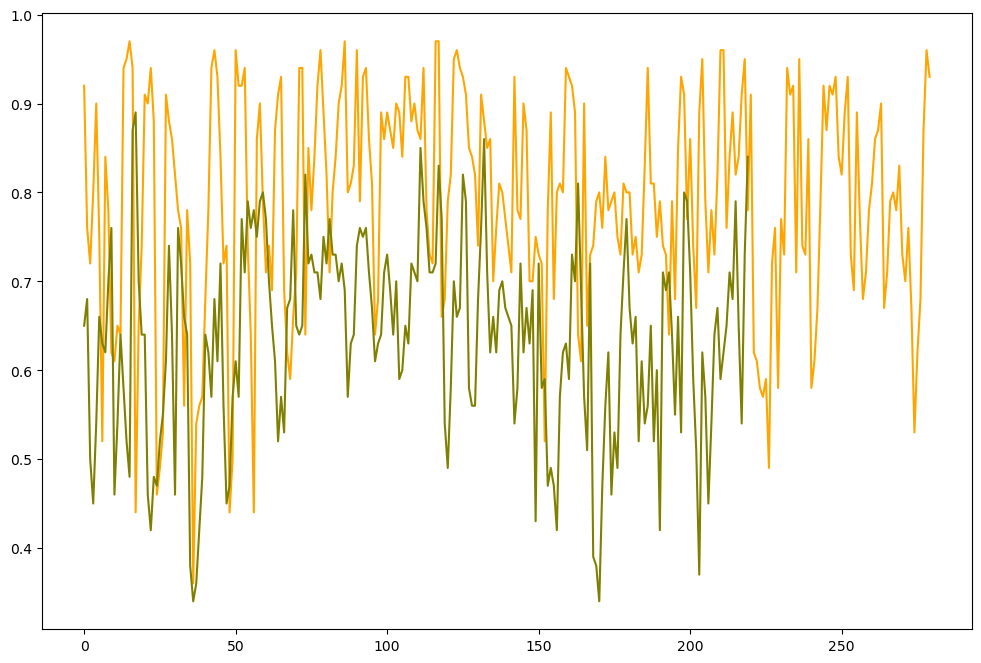

In [11]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

#### Scatter Plot of University Rating and The Chance of Admission

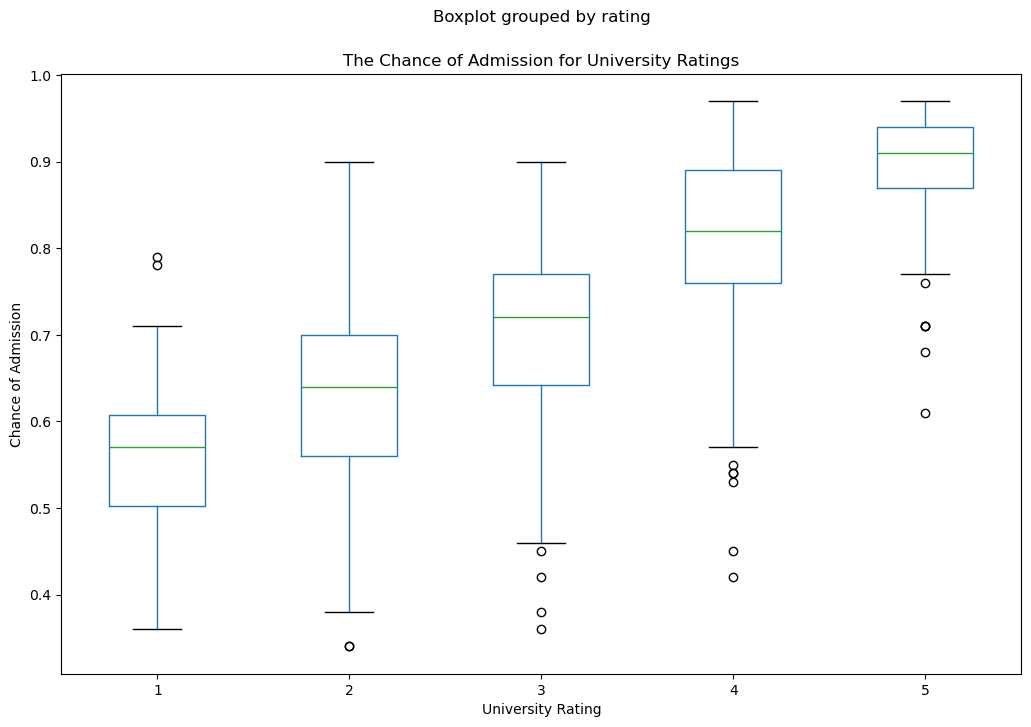

In [12]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

#### Histogram of Numeric Variables

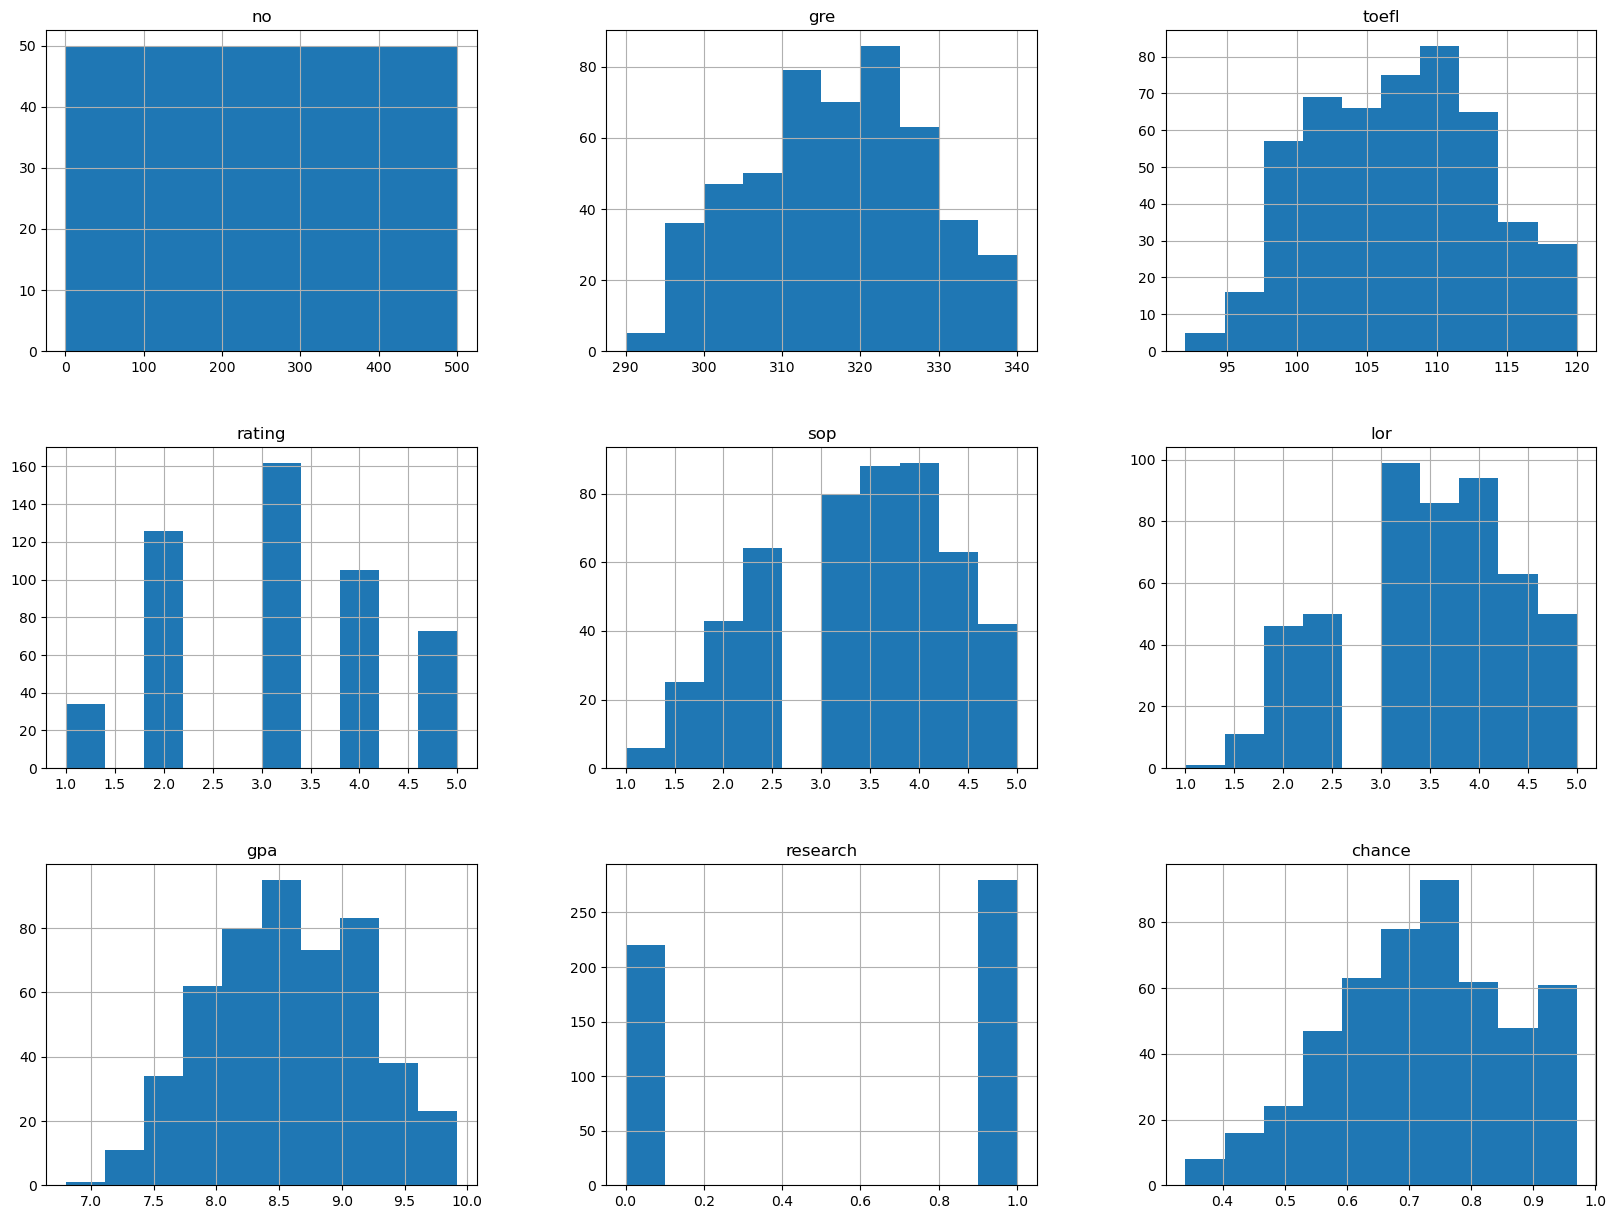

In [13]:
df.hist(bins=10, figsize=(20,15))
plt.show()

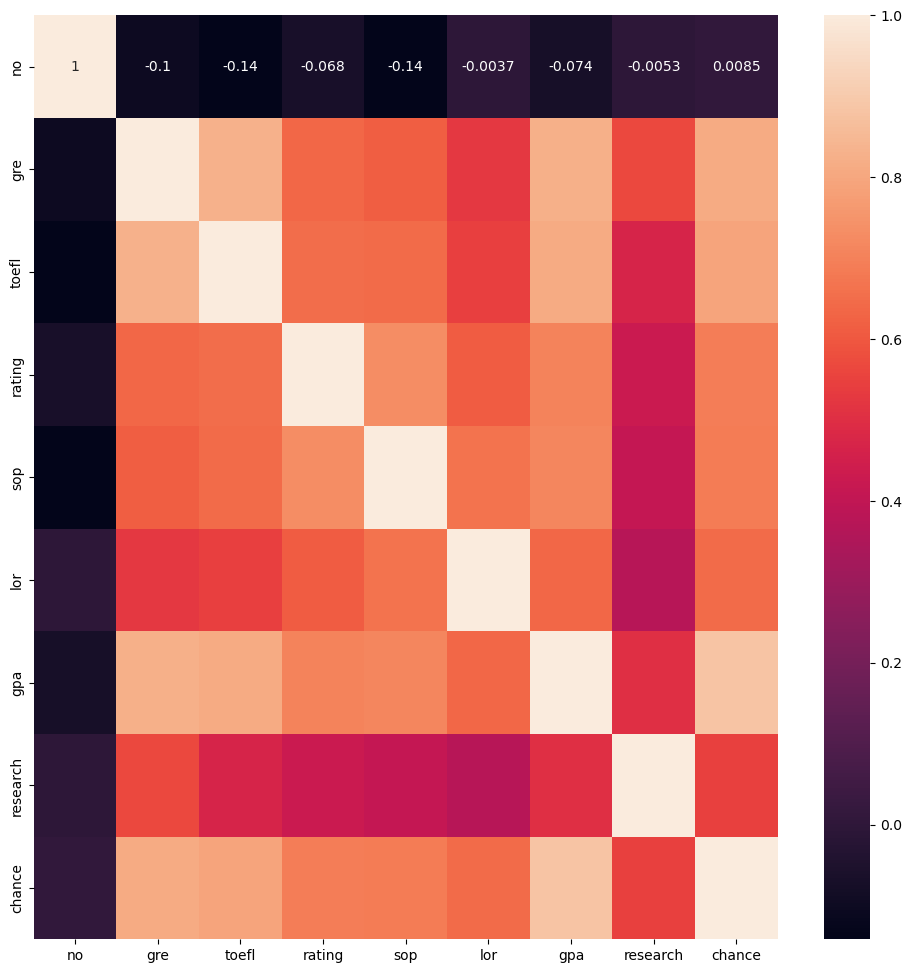

In [14]:
corr_matrix = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

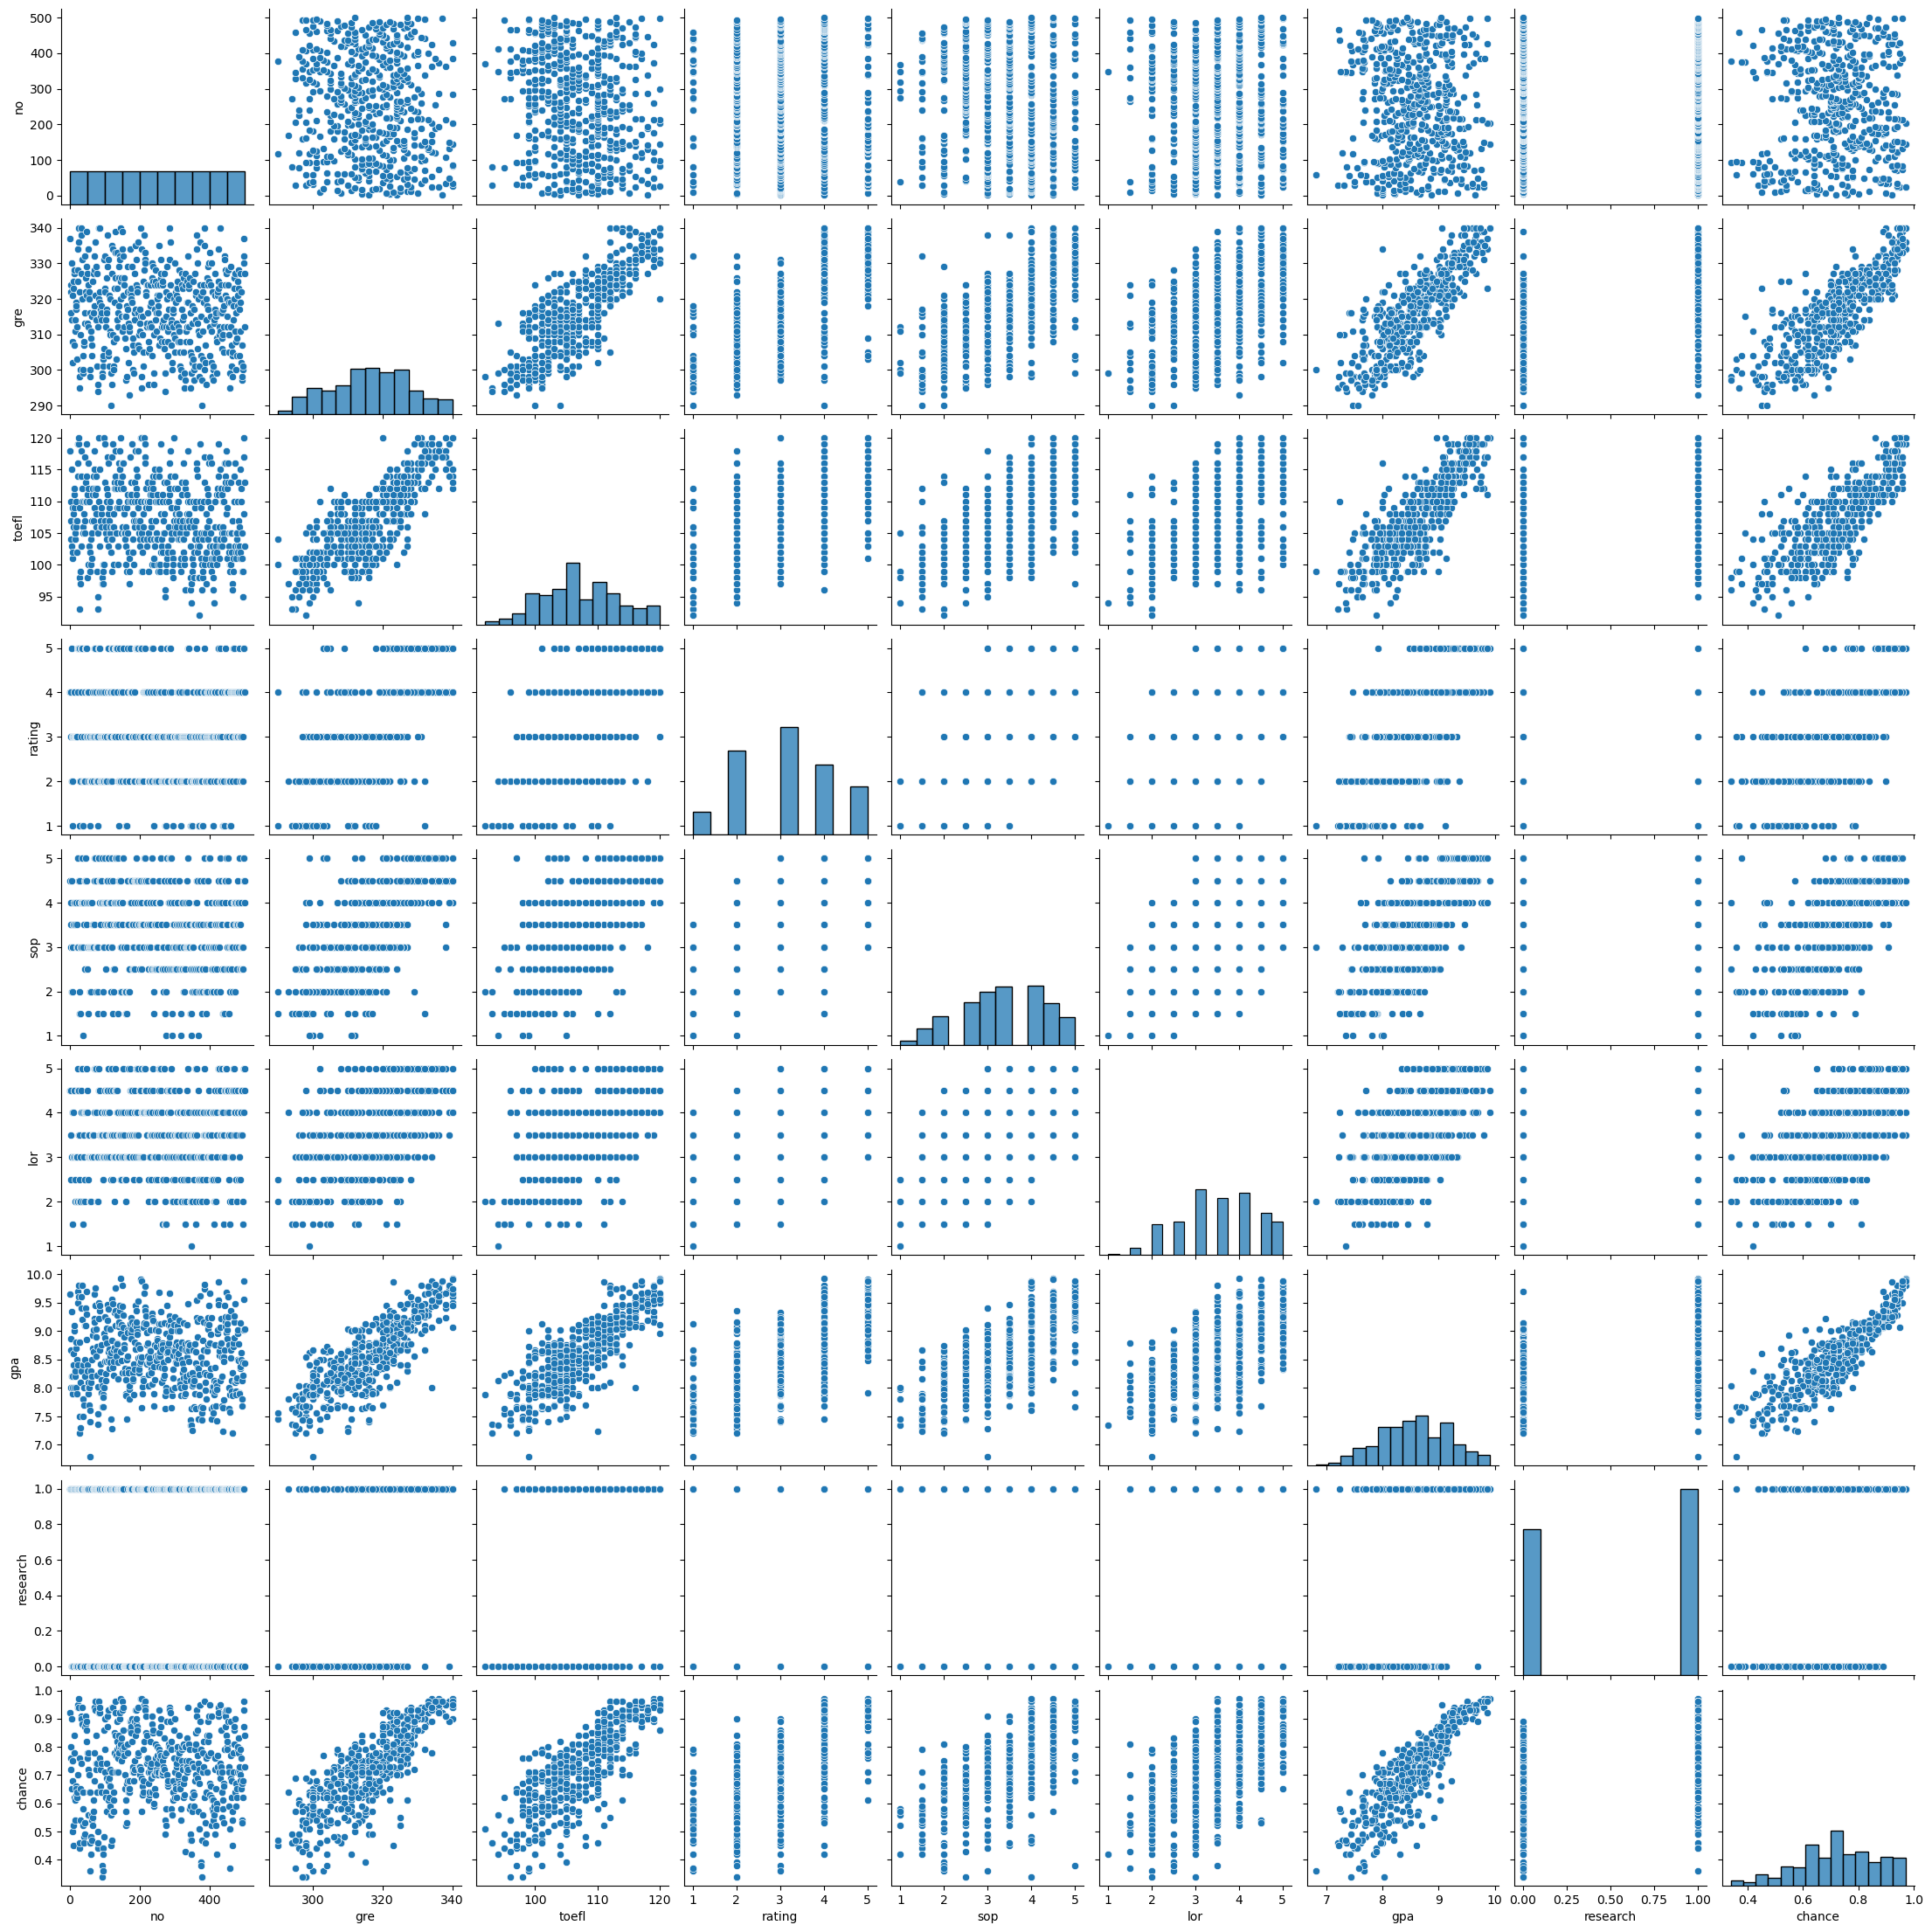

In [15]:
sns.pairplot(df)

### *Several observations:*:<br>
1) There is a very high correlation between GRE and TOEFL scores. A student who scores a high GRE score tends to score a similar high TOEFL score<br>
2) The chances of admission acceptance increase as GPA, SOP and University Ranking improve/increase<br>
3) Students who have research experience in the past, tend to have a higher change of acceptance to a university<br>
4) We can see that approximately 160 out of 500 students have a high chance of getting into a University with a ranking of 3

# Data Preperation

As it  can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

* The outcome variable is 'chance', and all other features are predictors.
* 'no' variable should be dropped from dataset since it only indicator of the instances (means ID Column)

In [16]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [17]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

In [18]:
df.shape

(500, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   rating    500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   gpa       500 non-null    float64
 6   research  500 non-null    int64  
 7   chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [20]:
df.columns

Index(['gre', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research', 'chance'], dtype='object')

In [21]:
df.head()

,gre,toefl,rating,sop,lor,gpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Classification Models & Furher Analysis
In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 83% chance. Third quartile, 83%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [22]:
df.loc[df['chance']>=0.83,'target']=1
df.loc[df['chance']<=0.83,'target']=0
#df['chance']=df['chance'].astype(int)

In [23]:
df.head()

,gre,toefl,rating,sop,lor,gpa,research,chance,target
0,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,0.0
2,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,322,110,3,3.5,2.5,8.67,1,0.80,0.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [24]:
df.tail()

,gre,toefl,rating,sop,lor,gpa,research,chance,target
495,332,108,5,4.5,4.0,9.02,1,0.87,1.0
496,337,117,5,5.0,5.0,9.87,1,0.96,1.0
497,330,120,5,4.5,5.0,9.56,1,0.93,1.0
498,312,103,4,4.0,5.0,8.43,0,0.73,0.0
499,327,113,4,4.5,4.5,9.04,0,0.84,1.0


* 'chance' variable should be dropped from dataset since we made target variable as per the condition applied

In [25]:
df.drop(['chance'],axis=1,inplace=True)

## **Spliting the data into train and test**

In [26]:
df.head()

,gre,toefl,rating,sop,lor,gpa,research,target
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,0.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   rating    500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   gpa       500 non-null    float64
 6   research  500 non-null    int64  
 7   target    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [28]:
df['target']=df['target'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   rating    500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   gpa       500 non-null    float64
 6   research  500 non-null    int64  
 7   target    500 non-null    int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 29.4 KB


In [30]:
# create x & y 
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [31]:
print(x.shape)
print(y.shape)

(500, 7)
(500,)


**Scaling the dataset**<br>
scaling the data before training the model,df consists of diff features and their ranges are variable for these features, hence, we need scaling,This is done to avoid biasing while predicting the y variable improve the Accuracy 

In [32]:
#scaling
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(x)
x = scaler.transform(x)

**Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.**

In [33]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=10)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0]


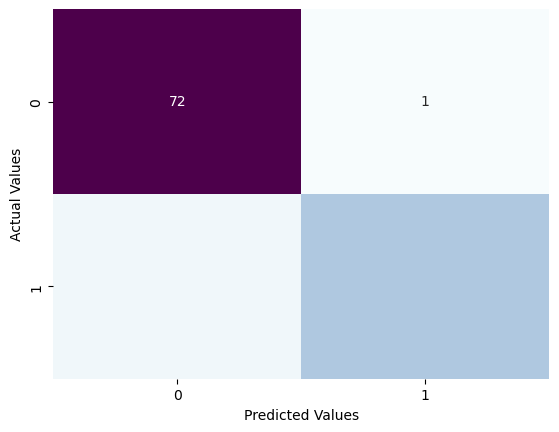

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.96      0.85      0.90        27

    accuracy                           0.95       100
   macro avg       0.95      0.92      0.93       100
weighted avg       0.95      0.95      0.95       100

Accuracy of the model:  0.95


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

Log_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",Log_acc)

In [37]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

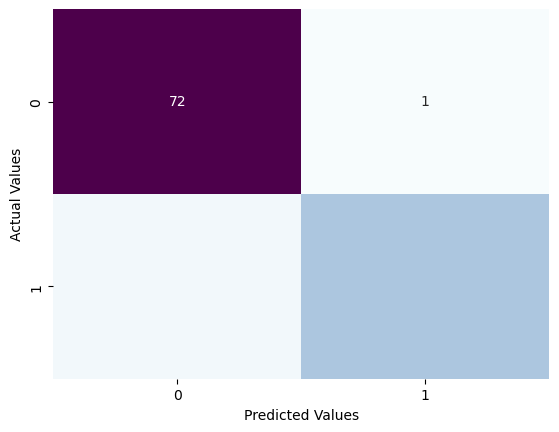

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.96      0.89      0.92        27

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

KNN_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",KNN_acc)

In [39]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,Y_train)
#predicting the test set results
Y_pred = classifier.predict(X_test)

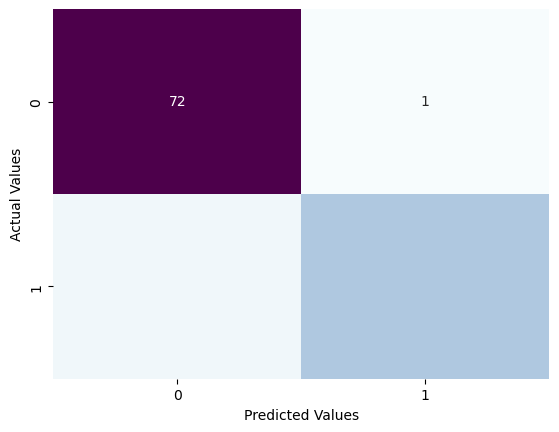

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.96      0.85      0.90        27

    accuracy                           0.95       100
   macro avg       0.95      0.92      0.93       100
weighted avg       0.95      0.95      0.95       100

Accuracy of the model:  0.95


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

SVC_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SVC_acc)

In [41]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=None,random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

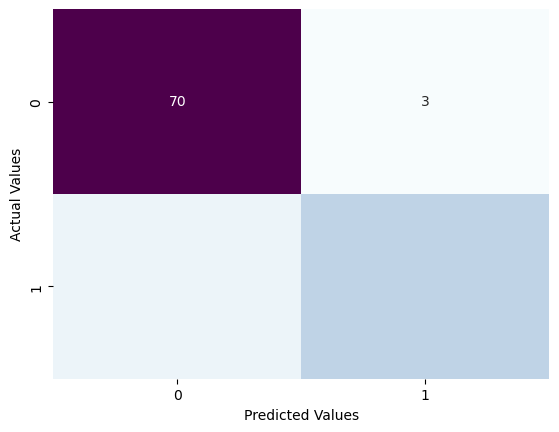

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        73
           1       0.87      0.74      0.80        27

    accuracy                           0.90       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.90      0.90      0.90       100

Accuracy of the model:  0.9


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

DT_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",DT_acc)

In [43]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=65,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

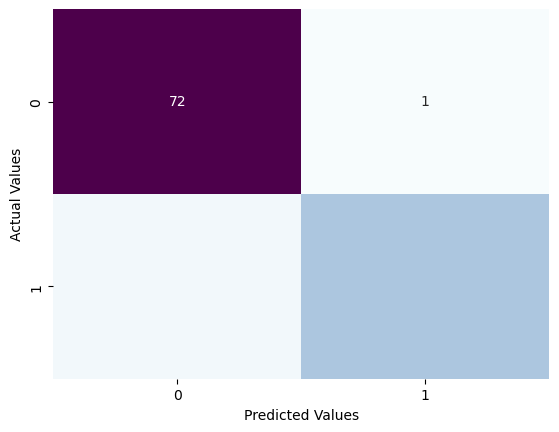

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.96      0.89      0.92        27

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

RF_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",RF_acc)

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)

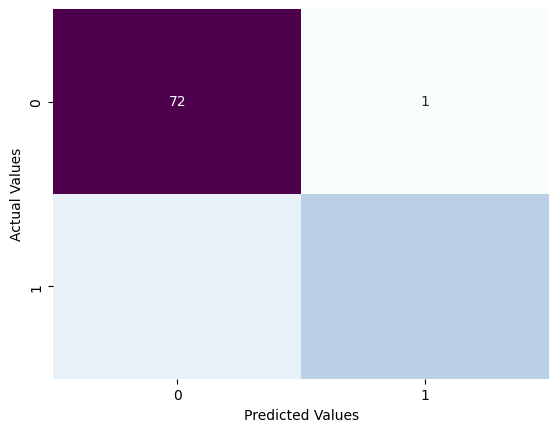

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        73
           1       0.95      0.74      0.83        27

    accuracy                           0.92       100
   macro avg       0.93      0.86      0.89       100
weighted avg       0.92      0.92      0.92       100

Accuracy of the model:  0.92


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

ET_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",ET_acc)

In [47]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

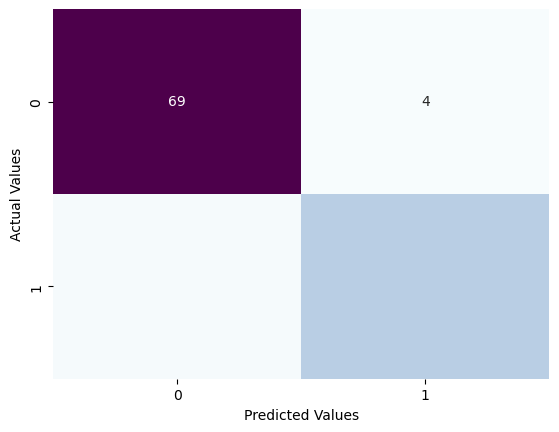

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.85      0.81      0.83        27

    accuracy                           0.91       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

ADA_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",ADA_acc)

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=10000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

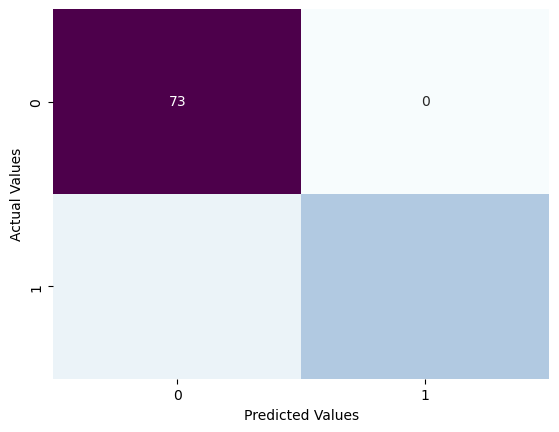

Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        73
           1       1.00      0.81      0.90        27

    accuracy                           0.95       100
   macro avg       0.97      0.91      0.93       100
weighted avg       0.95      0.95      0.95       100

Accuracy of the model:  0.95


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

XGB_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",XGB_acc)

**SMOTE** :

In [52]:
import imblearn

In [53]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [55]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [56]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  93
Before OverSampling, counts of label '0':  307
After OverSampling, the shape of train_X:  (614, 7)
After OverSampling, the shape of train_y:  (614,)
After OverSampling, counts of label '1':  307
After OverSampling, counts of label '0':  307


In [57]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)

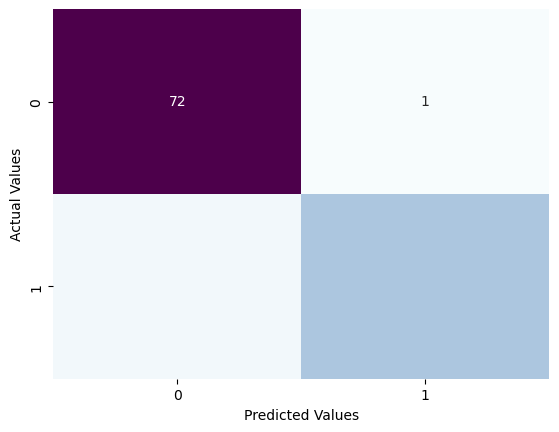

Classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        73
         1.0       0.96      0.89      0.92        27

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SRF_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SRF_acc)

In [59]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=151,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)

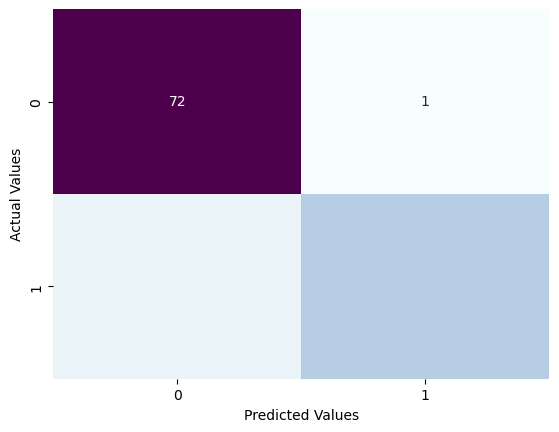

Classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        73
         1.0       0.95      0.78      0.86        27

    accuracy                           0.93       100
   macro avg       0.94      0.88      0.91       100
weighted avg       0.93      0.93      0.93       100

Accuracy of the model:  0.93


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SET_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SET_acc)

In [61]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=200,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred=model_AdaBoost.predict(X_test)

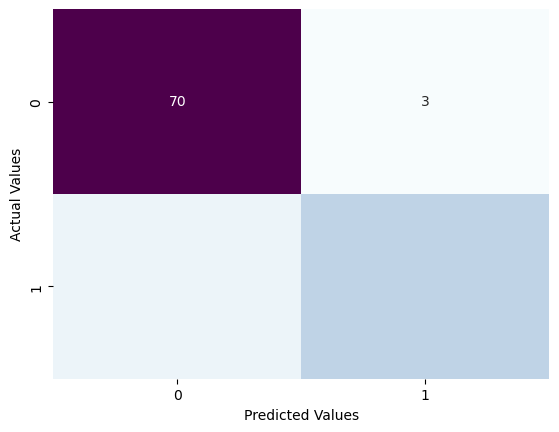

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        73
         1.0       0.87      0.74      0.80        27

    accuracy                           0.90       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.90      0.90      0.90       100

Accuracy of the model:  0.9


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SADA_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SADA_acc)

In [63]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=1000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

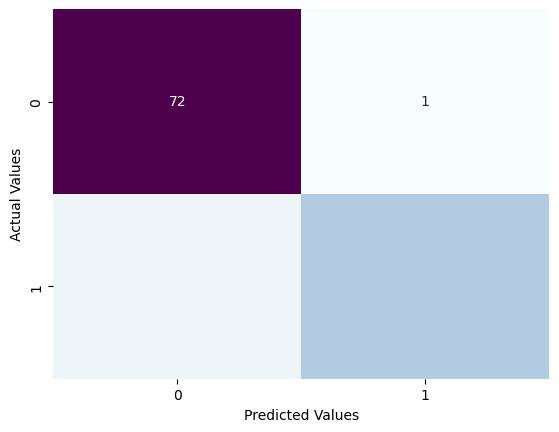

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        73
         1.0       0.96      0.81      0.88        27

    accuracy                           0.94       100
   macro avg       0.95      0.90      0.92       100
weighted avg       0.94      0.94      0.94       100

Accuracy of the model:  0.94


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SXGB_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SXGB_acc)

In [65]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)

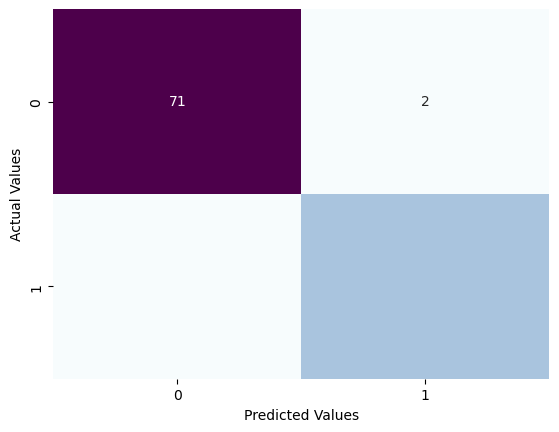

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        73
         1.0       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SLOG_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SLOG_acc)

In [67]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_res,Y_train_res)
#predicting the test set results
Y_pred = classifier.predict(X_test)

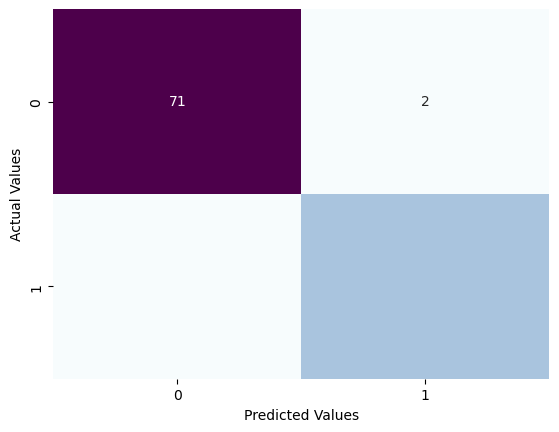

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        73
         1.0       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

Accuracy of the model:  0.96


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SSVC_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SSVC_acc)

In [69]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=4,
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)

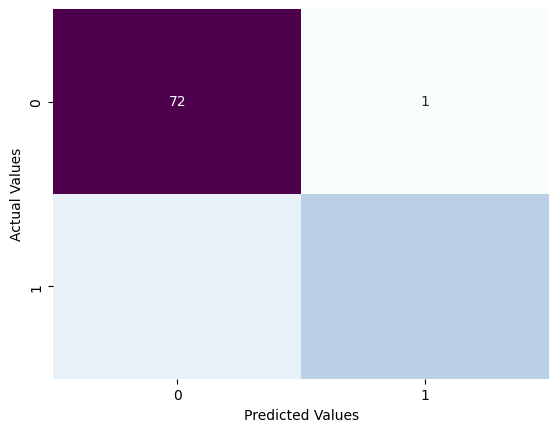

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95        73
         1.0       0.95      0.74      0.83        27

    accuracy                           0.92       100
   macro avg       0.93      0.86      0.89       100
weighted avg       0.92      0.92      0.92       100

Accuracy of the model:  0.92


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

SKNN_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",SKNN_acc)

In [71]:
#predicting using the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam,SGD,RMSprop

In [72]:
df.head()

,gre,toefl,rating,sop,lor,gpa,research,target
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [73]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [74]:
#Building a neural network:
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(X_train)
x_test_norm = normalizer.fit_transform(X_test)

In [75]:
model_1=Sequential()

In [76]:
model_1.add(Dense(12,input_shape=(7,),activation='sigmoid'))

In [77]:
model_1.add(Dense(1,activation='sigmoid'))

In [78]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
model_1.compile(SGD(learning_rate=0.01),"binary_crossentropy",metrics=["accuracy"])

In [80]:
run_hist_1=model_1.fit(x_train_norm,Y_train,validation_data=(x_test_norm,Y_test),epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3623 - loss: 0.7463 - val_accuracy: 0.4600 - val_loss: 0.7424
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5777 - loss: 0.7074 - val_accuracy: 0.6200 - val_loss: 0.7128
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6807 - loss: 0.6782 - val_accuracy: 0.6700 - val_loss: 0.6893
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7004 - loss: 0.6768 - val_accuracy: 0.7100 - val_loss: 0.6693
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7400 - loss: 0.6515 - val_accuracy: 0.7300 - val_loss: 0.6512
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7639 - loss: 0.6196 - val_accuracy: 0.7300 - val_loss: 0.6357
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.6005 - val_accuracy: 0.7300 - val_loss: 0.6222
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - loss: 0.5894 - val_accuracy: 0.7300 - 

In [81]:
y_pred_prob_nn_1=model_1.predict(x_test_norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


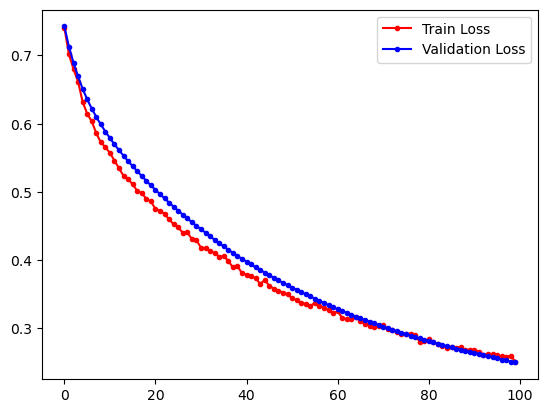

In [82]:
fig,ax=plt.subplots()
ax.plot(run_hist_1.history["loss"],'r',marker='.',label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b',marker='.',label="Validation Loss")
ax.legend()


In [83]:
test_loss, test_acc = model_1.evaluate(x_train_norm, Y_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.2630 


In [84]:
print(f"Test accuracy : {test_acc}")

Test accuracy : 0.9474999904632568


In [85]:
import seaborn as sns

## Conclusion

Text(0.5, 1.0, 'Model Accuracy')

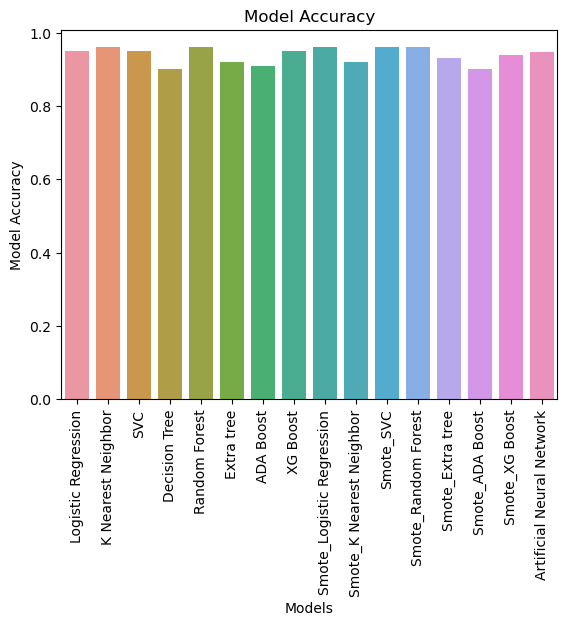

In [86]:
#plt.style.use("seaborn")

x = ["Logistic Regression","K Nearest Neighbor","SVC","Decision Tree", "Random Forest", "Extra tree", "ADA Boost","XG Boost",
     "Smote_Logistic Regression","Smote_K Nearest Neighbor","Smote_SVC","Smote_Random Forest", "Smote_Extra tree",
     "Smote_ADA Boost","Smote_XG Boost","Artificial Neural Network"]
y = [Log_acc,KNN_acc,SVC_acc,DT_acc,RF_acc,ET_acc,ADA_acc,XGB_acc,SLOG_acc,SKNN_acc,SSVC_acc,SRF_acc,SET_acc,SADA_acc,SXGB_acc,test_acc]

sns.barplot(x=x, y=y)
plt.ylabel("Model Accuracy")
plt.xlabel("Models")
plt.xticks(rotation = 90)
plt.title("Model Accuracy")

<h2 align='center' style='color:purple'> According to the above predictions, we can observe multiple models are giving multiple different predictions Out of all those models, we can observe that KNN & RANDOM FOREST are  performing well in terms of predicting and with using SMOTE algorithms SUPPORT VECTOR MACHINE,LOGISTIC REGRESSION & RANDOM FOREST are performing well and giving accuracy 96%.</h2>


### DEPLOYMENT OF THE MODEL

Deploying my model with smote done random forest since RANDOM FOREST is performing well and giving accuracy 96%.

In [87]:
print("Accuracy of the model: ",SRF_acc)

Accuracy of the model:  0.96


In [88]:
#pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [91]:
streamlit

NameError: name 'streamlit' is not defined